# Lab 1: Part A
### General Guidelines:

For Part A of the lab, you will be asked to perform a few specific calculations or manipulations on the data, similar to the exercises at the end of the practice workbooks.  These tasks all have a single correct answer.  You will be graded on the correctness of your code and answer.

### Submission:

Please turn in a static document, i.e., an html or pdf file.  Do not turn in your Jupyter or R Markdown notebook.
Please make sure that your source code (i.e., the code chunks) and output (the results or plots) are both visible.
You do not need to include any discussion or description of your work, unless specifically asked to.
You do not need to make this document presentable or polished, as long as it is readable by me.  For example, a screen print of a Jupyter notebook would be fine for this part of the lab.
You may work collaboratively on this, in the sense that you are welcome to discuss strategies and ideas, and compare answers.  However, do not directly copy code or send/share notebooks; your work should all be your own.

### Assignment:

Using the okcupid.csv dataset from the Colab exercises, do the following:

1.  What is the distribution of reported sexual orientation of users in this dataset?

2.  Within each reported sexual orientation category, what is the distribution of reported gender?

3.  Within each reported gender, what is the distribution of sexual orientation?

4.  Of your answers to (2) and (3), which do you think is the more informative calculation?  Why?

5.  Make a visualization of the distribution of drinking status.

6.  Create a new variable that indicates whether the user has, likes, or dislikes cats. Visualize the distribution of this variable.

7.  If you were a heterosexual female interested in dating a non-smoker, how many options would you have in this data set?

In [108]:
#loading the data and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = "https://dlsun.github.io/pods/data/"
df_okcupid = pd.read_csv(data_dir + "okcupid.csv")

Text(0.5, 1.0, 'OkCupid Sexual Orientation Counts')

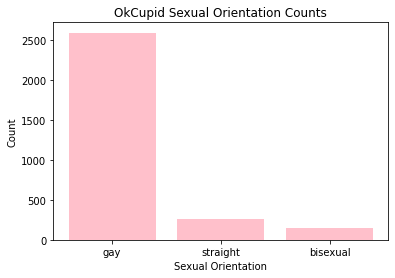

In [109]:
#1.  What is the distribution of reported sexual orientation of users in this dataset?
orientation_counts = df_okcupid["orientation"].value_counts()
orientations=pd.unique(df_okcupid.orientation)
plt.bar(orientations, orientation_counts, color="pink")
plt.xlabel("Sexual Orientation")
plt.ylabel("Count")
plt.title("OkCupid Sexual Orientation Counts")

In [113]:
#2.  Within each reported sexual orientation category, what is the distribution of reported gender?
orientation_gay_male = len(df_okcupid[(df_okcupid["sex"] == "m") & (df_okcupid["orientation"] == "gay")])
orientation_gay_female = len(df_okcupid[(df_okcupid["sex"] == "f") & (df_okcupid["orientation"] == "gay")])

orientation_straight_male = len(df_okcupid[(df_okcupid["sex"] == "m") & (df_okcupid["orientation"] == "straight")])
orientation_straight_female = len(df_okcupid[(df_okcupid["sex"] == "f") & (df_okcupid["orientation"] == "straight")])

orientation_bisexual_male = len(df_okcupid[(df_okcupid["sex"] == "m") & (df_okcupid["orientation"] == "bisexual")])
orientation_bisexual_female = len(df_okcupid[(df_okcupid["sex"] == "f") & (df_okcupid["orientation"] == "bisexual")])

proportion_gay=orientation_gay_male/(orientation_gay_female+orientation_gay_male)
print("gay males:", orientation_gay_male,"- gay females:", orientation_gay_female)
print("proportion of gay males:",round(proportion_gay,4))

proportion_straight=orientation_straight_male/(orientation_straight_female+orientation_straight_male)
print("straight males:", orientation_straight_male,"- straight females:", orientation_straight_female)
print("proportion of straight males:",round(proportion_straight,4))

proportion_bisexual=orientation_bisexual_male/(orientation_bisexual_female+orientation_bisexual_male)
print("bisexual males:", orientation_bisexual_male,"- bisexual females:", orientation_bisexual_female)
print("proportion of bisexual males:",round(proportion_bisexual,4))

gay males: 191 - gay females: 72
proportion of gay males: 0.7262
straight males: 1560 - straight females: 1035
proportion of straight males: 0.6012
bisexual males: 37 - bisexual females: 105
proportion of bisexual males: 0.2606


In [82]:
#3.  Within each reported gender, what is the distribution of sexual orientation?
males = df_okcupid[(df_okcupid["sex"] == "m")]
females = df_okcupid[(df_okcupid["sex"] == "f")]
male_orientations=males["orientation"].value_counts(normalize=True);
print("male sexual orientation breakdown:\n",male_orientations)
female_orientations=females["orientation"].value_counts(normalize=True);
print("female sexual orientation breakdown:\n",female_orientations)


male sexual orientation breakdown: 
 straight    0.872483
gay         0.106823
bisexual    0.020694
Name: orientation, dtype: float64
female sexual orientation breakdown: 
 straight    0.853960
bisexual    0.086634
gay         0.059406
Name: orientation, dtype: float64


4.  Of your answers to (2) and (3), which do you think is the more informative calculation?  Why?
I think it is more infomrative to know question 3, or what the males sexual oreintation breakdown is. This is important because if I'm straight, 82% of males are also straight, but if I look at straight people, only 62% are males. They show differnet information, and given that this is a dating site, it would be more imporant to see your prefered partner gender, then their sexual orientation than the orientation then down to gender.

socially       2056
rarely          301
often           287
not at all      164
very often       28
desperately      13
Name: drinks, dtype: int64


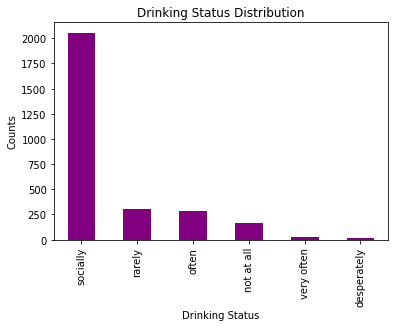

In [114]:
#5.  Make a visualization of the distribution of drinking status.
drink_counts = df_okcupid["drinks"].value_counts();

drink_counts.plot.bar(color="purple", xlabel="Drinking Status", ylabel="Counts", title="Drinking Status Distribution")
print(drink_counts)

<AxesSubplot:title={'center':'Feelings Towards Cats as Pets Distribution'}, xlabel='Feelings towards cats', ylabel='Counts'>

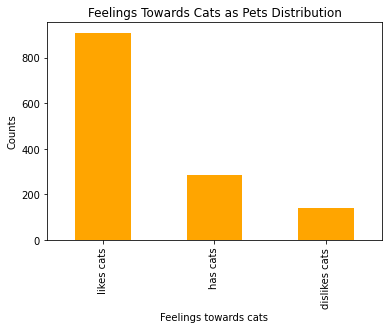

In [112]:
#6.  Create a new variable that indicates whether the user has, likes, or dislikes cats. 
# Visualize the distribution of this variable.

df_okcupid["cats"]=df_okcupid["pets"].map({
    "likes dogs and has cats":"has cats",
    "dislikes dogs and has cats":"has cats",
    "has dogs and has cats":"has cats",
    "has dogs and likes cats":"likes cats",
    "likes cats":"likes cats",
    "likes dogs and likes cats":"likes cats",
    "likes dogs and dislikes cats":"dislikes cats",
    "dislikes dogs and dislikes cats":"dislikes cats",
    "has dogs and dislikes cats":"dislikes cats"
});

cat_counts = df_okcupid["cats"].value_counts()
cat_counts.plot.bar(color="orange", xlabel="Feelings towards cats", ylabel="Counts", title="Feelings Towards Cats as Pets Distribution")


In [70]:
#7.  If you were a heterosexual female interested in dating a non-smoker, how many options would you have in this data set?
options=len(df_okcupid[(df_okcupid["sex"] == "m") & (df_okcupid["orientation"] == "straight") & (df_okcupid["smokes"] == "no")])
print("I would have", options,"options.")


I would have 1107 options.
